In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve
from scipy import stats
%matplotlib inline

In [3]:
source = 'data/heart.csv'

In [4]:
df = pd.read_csv(source)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### We have to prognos target(diseases) using dataset. 0 - healthy, 1 - heart diseases. Lets rename columns.

In [6]:
df.columns = ['age', 'sex', 'pain', 'artery_pressure', 'chol', 'sugar', 'ecc', 
              'heart_rate', 'exercise_angina', 'st_depression','st_exercise', 'vessels', 'thalassemia', 'target']

In [7]:
df.head()

,age,sex,pain,artery_pressure,chol,sugar,ecc,heart_rate,exercise_angina,st_depression,st_exercise,vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### We will determine the accuracy, precision and recall before data analysis

In [8]:
y = pd.DataFrame(df, columns=["target"])
X = pd.DataFrame(df, columns=['age', 'sex', 'pain', 'artery_pressure', 'chol', 'sugar', 'ecc', 
              'heart_rate', 'exercise_angina', 'st_depression','st_exercise', 'vessels', 'thalassemia'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(y_pred)
print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision {precision_score(y_test, y_pred)}')
print(f'recall:{recall_score(y_test, y_pred)}')

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1
 1 0 1 0 1 0 1 1 0 0 0]
accuracy: 0.8360655737704918
precision 0.8571428571428571
recall:0.8571428571428571


C:\Users\Alfa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alfa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


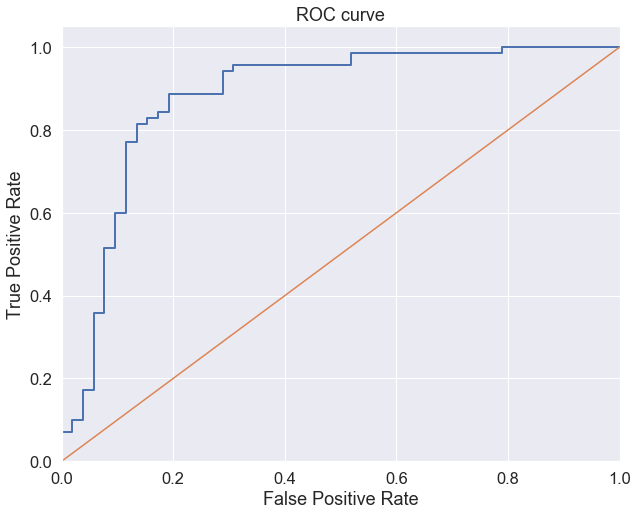

In [9]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### We have accuracy, precision and recall 0.8278688524590164, 0.855072463768116, 0.8428571428571429 respectively, and big square under curve

### Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020030890EF0>,
      dtype=object)

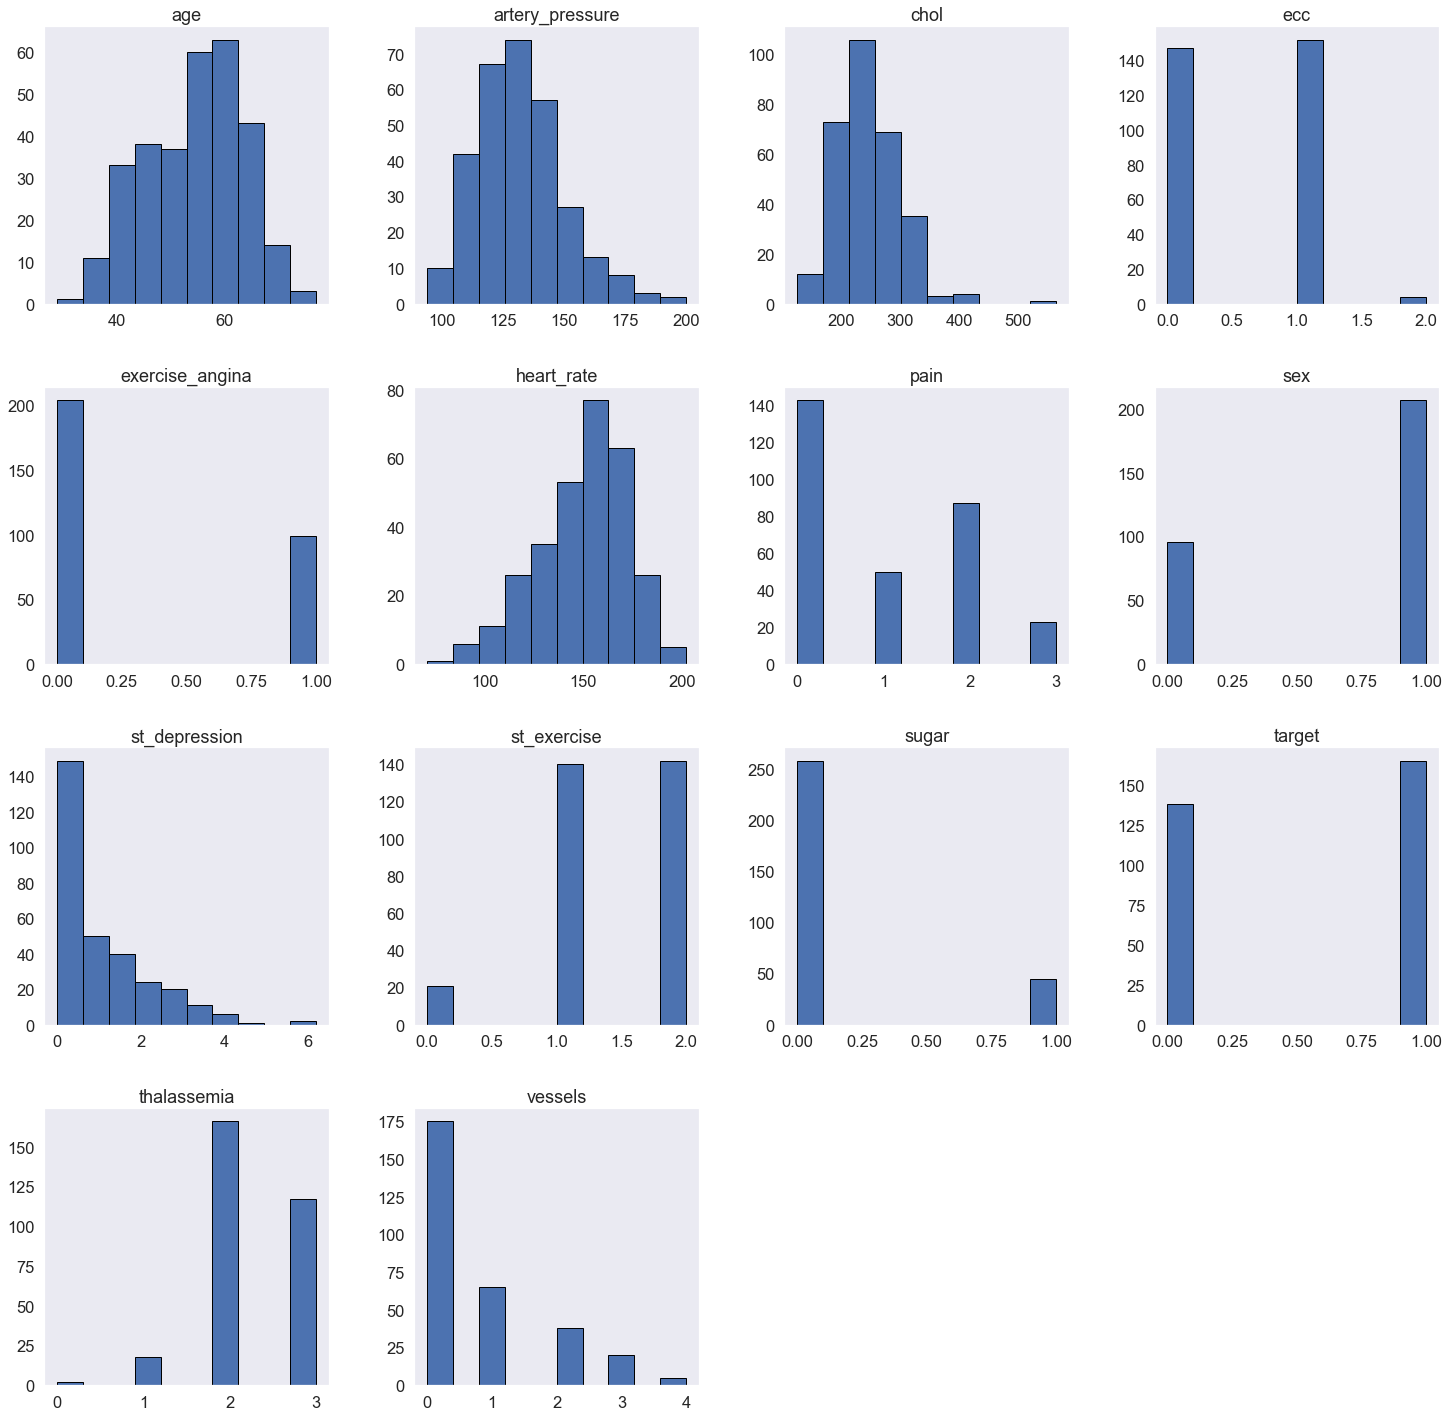

In [10]:
df.hist(figsize=(25,25), ec = 'black', grid = False)

In [11]:
quantitative = df[['age', 'artery_pressure', 'chol', 'st_depression', 'heart_rate']]

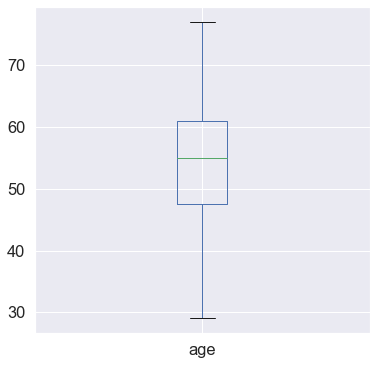

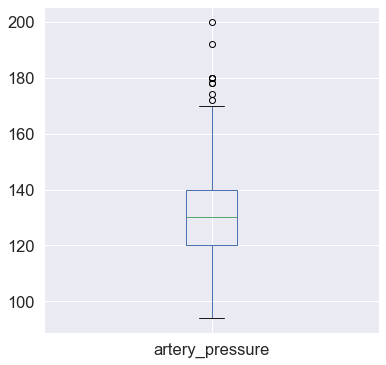

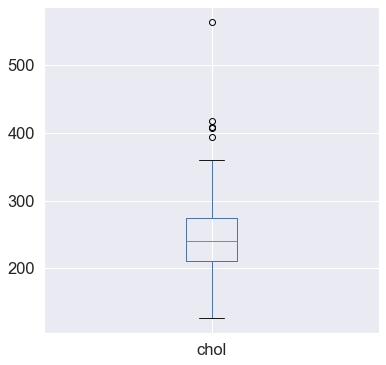

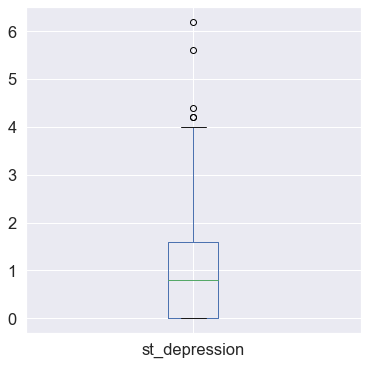

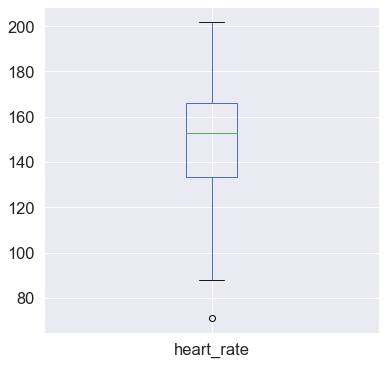

In [12]:
for i in quantitative:
    plt.figure(figsize=(6,6))
    df[i].plot.box(grid=True)

**We can see that heart_rate, st_depression, chol, artery_pressure have data which is situated beyond of boxplot. From one side we can think this as mistakes, from another side this datas could be.**

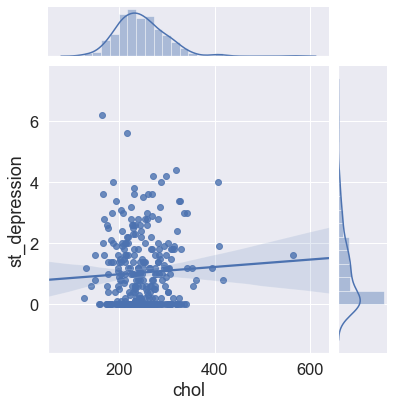

In [13]:
grid = sns.jointplot(df['chol'], df['st_depression'], kind = 'reg')

In [14]:
df[df['st_depression']>4]

,age,sex,pain,artery_pressure,chol,sugar,ecc,heart_rate,exercise_angina,st_depression,st_exercise,vessels,thalassemia,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


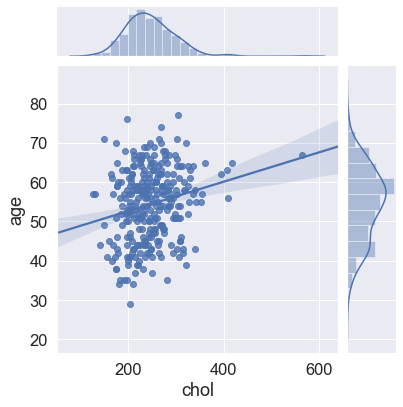

In [15]:
grid = sns.jointplot(df['chol'], df['age'], kind = 'reg')

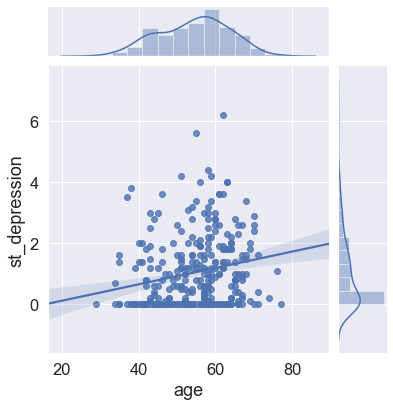

In [16]:
grid = sns.jointplot(df['age'], df['st_depression'], kind = 'reg')

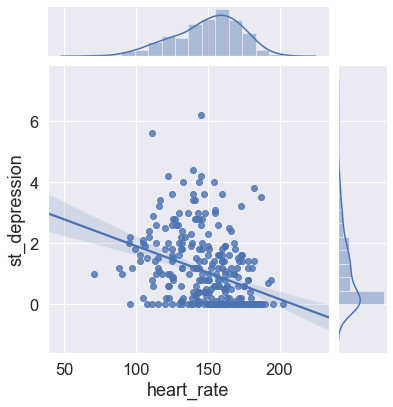

In [17]:
grid = sns.jointplot(df['heart_rate'], df['st_depression'], kind = 'reg')

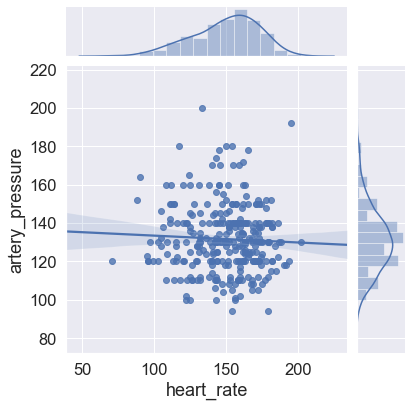

In [18]:
grid = sns.jointplot(df['heart_rate'], df['artery_pressure'], kind = 'reg')

It is very strange that a lot of people had maximum heart rate at least 90 per minute. We can show proportion between target (heart diseases) and heart rate.

In [20]:
for i in range(80,200,10):
    print(f'heart rate {i}: {df[df["heart_rate"]>i][df["target"]==1].count()[0]/df[df["heart_rate"]>i].count()[0]}')

heart rate 80: 0.5463576158940397
heart rate 90: 0.55
heart rate 100: 0.5559322033898305
heart rate 110: 0.5719298245614035
heart rate 120: 0.5939849624060151
heart rate 130: 0.6208333333333333
heart rate 140: 0.6556603773584906
heart rate 150: 0.7317073170731707
heart rate 160: 0.7727272727272727
heart rate 170: 0.8448275862068966
heart rate 180: 0.8333333333333334
heart rate 190: 0.75


C:\Users\Alfa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


We see that than more heart rate then more possibilitiy of heart diseases. Lets check with grath

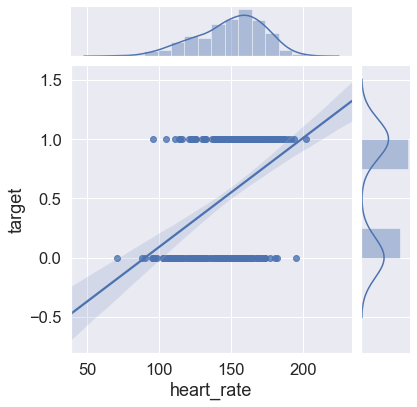

In [21]:
grid = sns.jointplot(df['heart_rate'], df['target'], kind = 'reg')

## Matrix of correletion

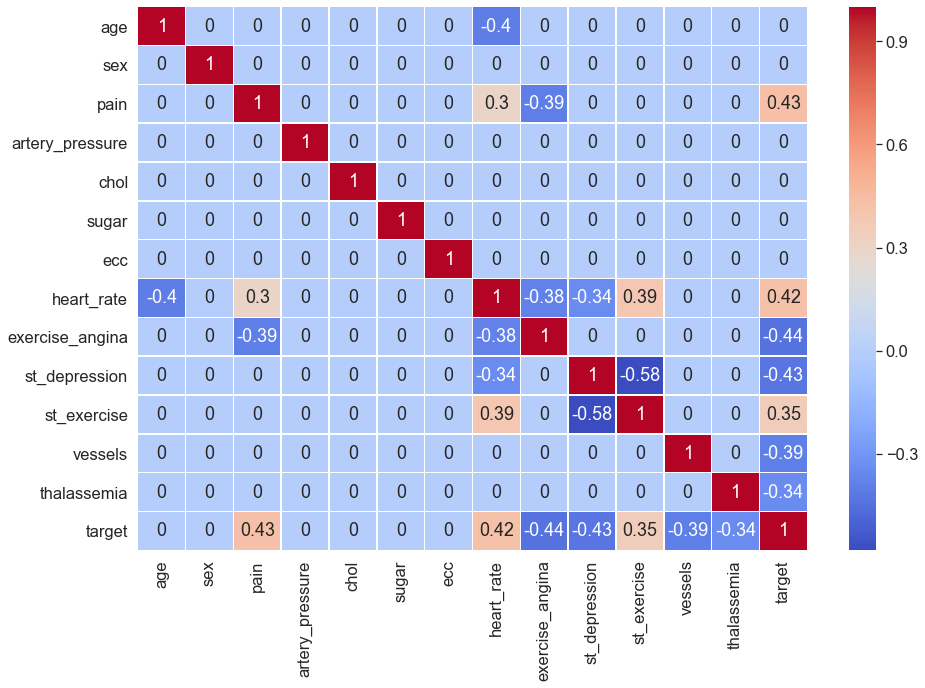

In [22]:
plt.figure(figsize = (15,10))

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.show()

In [23]:
df.corr()

,age,sex,pain,artery_pressure,chol,sugar,ecc,heart_rate,exercise_angina,st_depression,st_exercise,vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
artery_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ecc,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [24]:
category = df[['sex', 'pain', 'sugar', 'ecc', 'exercise_angina', 'st_exercise',
       'vessels', 'thalassemia', 'target']]

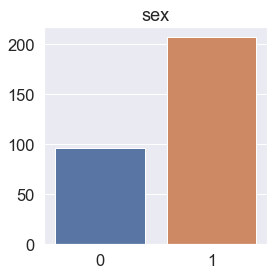

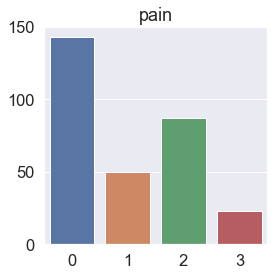

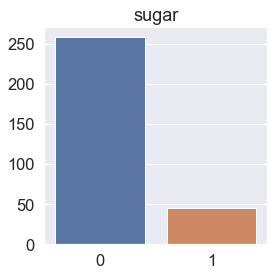

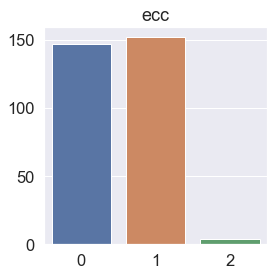

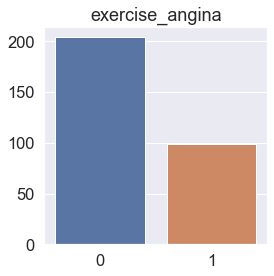

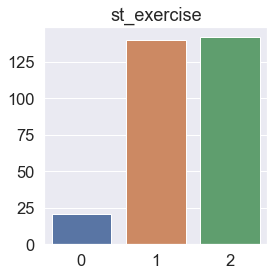

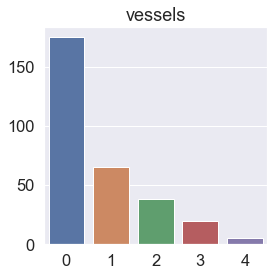

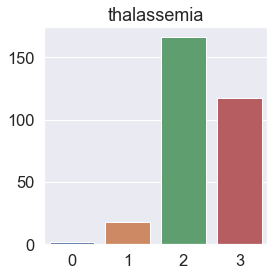

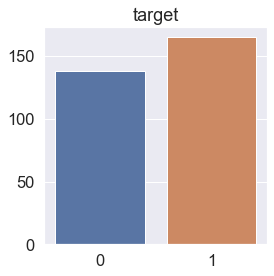

In [25]:
for i in category:
    plt.figure(figsize=(4,4))
    counts = category[i].value_counts()
    sns.barplot(counts.index, counts.values)
    plt.title(i)


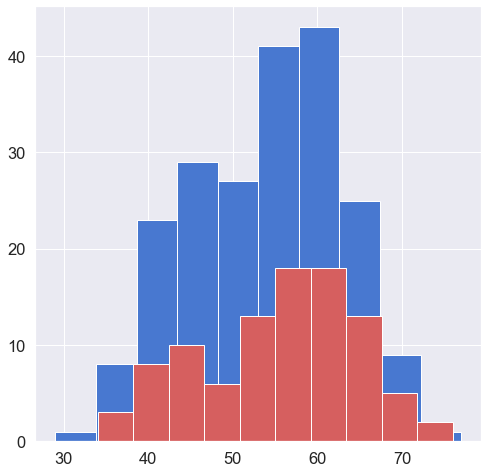

In [26]:
plt.figure(figsize=(8,8))
df[df['sex'] == 1]['age'].hist(color = 'b')
df[df['sex'] == 0]['age'].hist(color = 'r')


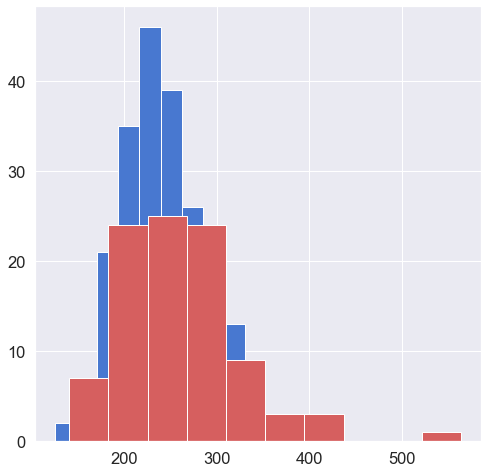

In [27]:
plt.figure(figsize=(8,8))
df[df['sex']==1]['chol'].hist(label = 'male', color = 'b')
df[df['sex']==0]['chol'].hist(label = 'female', color = 'r')

,age,artery_pressure,chol,st_depression,heart_rate
age,,,,,
29,29.0,130.000000,204.000000,0.000000,202.000000
34,34.0,118.000000,196.000000,0.350000,183.000000
35,35.0,126.500000,213.750000,0.750000,160.500000
37,37.0,125.000000,232.500000,1.750000,178.500000
38,38.0,132.000000,193.666667,1.266667,176.000000
39,39.0,122.500000,239.750000,0.300000,163.250000
40,40.0,134.000000,196.333333,1.133333,157.666667
41,41.0,119.000000,220.700000,0.340000,164.700000
42,42.0,127.000000,246.750000,0.500000,160.250000


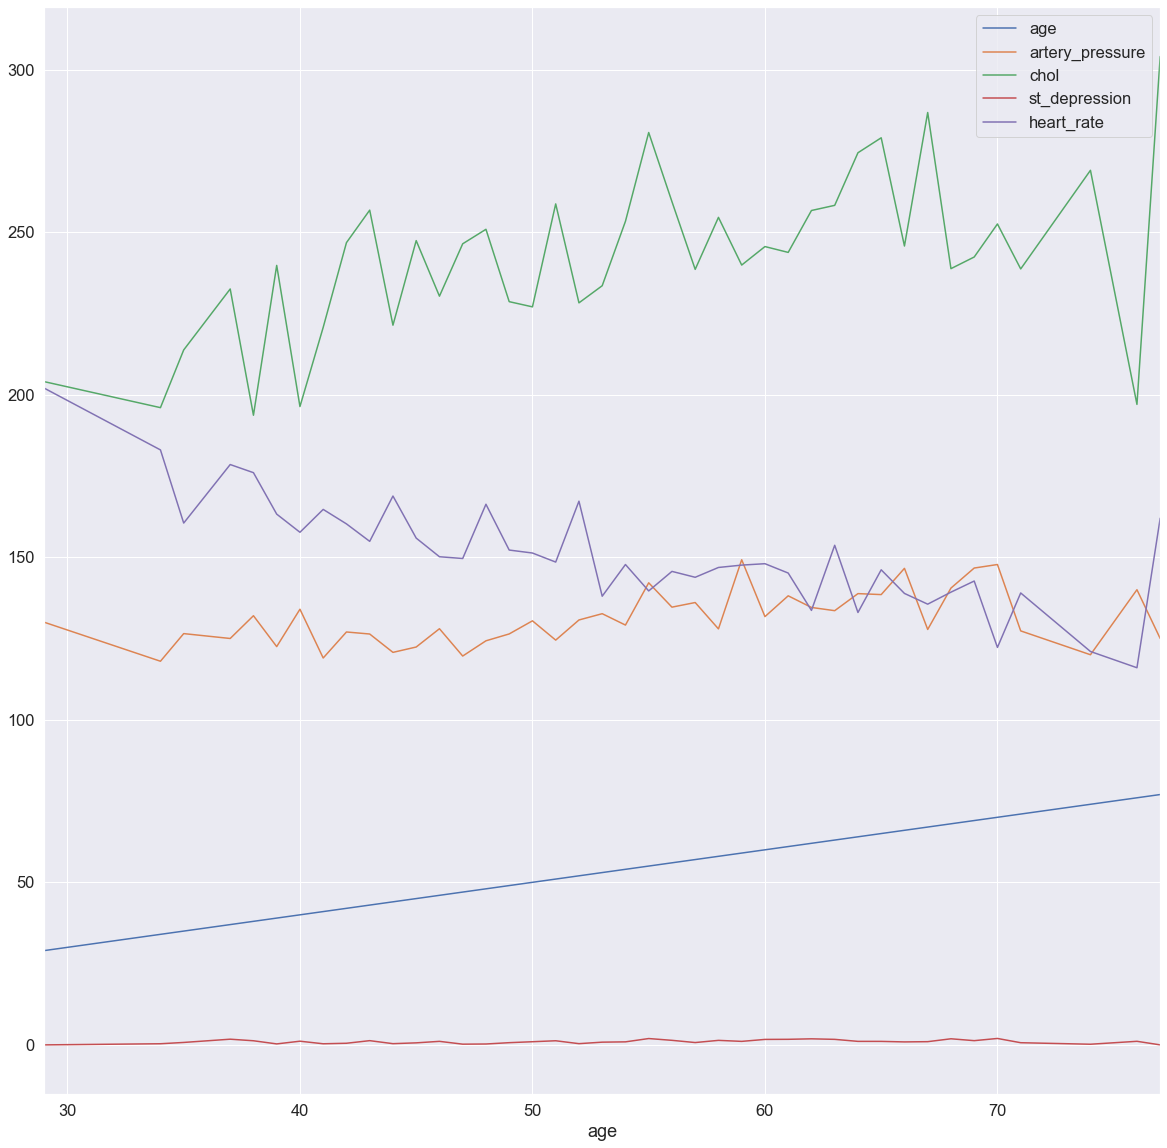

In [28]:
quantitative_gropubyage = quantitative.groupby(df['age']).mean()
quantitative_gropubyage.plot(figsize=(20,20), grid=True)
quantitative_gropubyage

We can see that mean cholesterol is increasing with age. At 76-year person the line is decreasing and then the line increasing at 77-year person. Also the mean heart rate gradually fall but finally fast increase at 77-year person.

Lets see the data when age more then 73 and less then 30

In [29]:
quantitative.groupby(df['age']).count()

,age,artery_pressure,chol,st_depression,heart_rate
age,,,,,
29,1,1,1,1,1
34,2,2,2,2,2
35,4,4,4,4,4
37,2,2,2,2,2
38,3,3,3,3,3
39,4,4,4,4,4
40,3,3,3,3,3
41,10,10,10,10,10
42,8,8,8,8,8


In [30]:
df[df['age']<30]

,age,sex,pain,artery_pressure,chol,sugar,ecc,heart_rate,exercise_angina,st_depression,st_exercise,vessels,thalassemia,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [31]:
df[df['age']>73]

,age,sex,pain,artery_pressure,chol,sugar,ecc,heart_rate,exercise_angina,st_depression,st_exercise,vessels,thalassemia,target
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [32]:
df[df['st_depression']>6]

,age,sex,pain,artery_pressure,chol,sugar,ecc,heart_rate,exercise_angina,st_depression,st_exercise,vessels,thalassemia,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0


In this small dataset i would discuss about 3 parameters. We can see that one young male with normal chol, high heart rate, st depression after exercise and atypical angina have heart diseases. It is very rare (young male) and i would exclude this parameter. In female who had heart rate 162/min I guess had problems with rhythm of her heart or here we have also mistake. One person has st_depression more than 6. I guess that its mistake because its huge parameter. This 3 people i offer to exclude.

In [33]:
df.drop(df.loc[df['age']<30].index, inplace=True)
df.drop(df.loc[df['age']>76].index, inplace=True)
df.drop(df.loc[df['st_depression']>6].index, inplace=True)


In [34]:
y = pd.DataFrame(df, columns=["target"])
X = pd.DataFrame(df, columns=['age', 'sex', 'pain', 'artery_pressure', 'chol', 'sugar', 'ecc', 
              'heart_rate', 'exercise_angina', 'st_depression','st_exercise', 'thalassemia'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(y_pred)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\nPrecision {precision_score(y_test, y_pred)}\nRecall:{recall_score(y_test, y_pred)}')


[0 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1
 0 1 0 1 1 1 0 0 0]
Accuracy: 0.875
Precision 0.90625
Recall:0.8656716417910447


C:\Users\Alfa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alfa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


At the beginning accuracy, precision and recall were 0.8278688524590164, 0.855072463768116, 0.8428571428571429 respectively.  

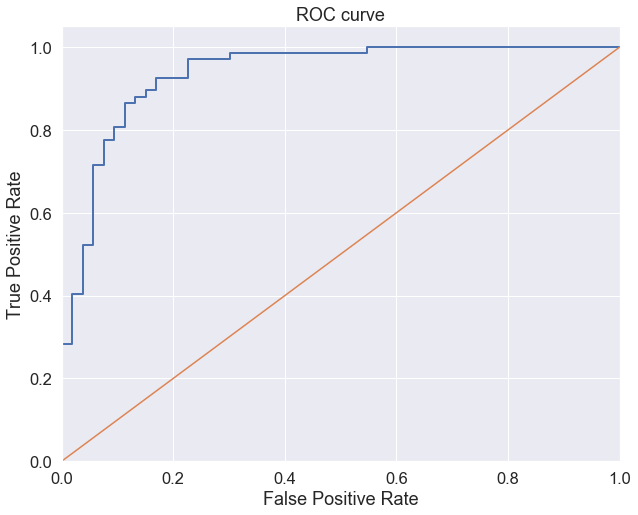

In [35]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

## This dataset shows best result if we just exclude people older then 73 years but i dont see at least one reason to do it.

# Lets check if we could predict age using chol, artery_presure, heart_rate, st_depression with default data. 

In [36]:
df = pd.read_csv(source)
df.columns = ['age', 'sex', 'pain', 'artery_pressure', 'chol', 'sugar', 'ecc', 
              'heart_rate', 'exercise_angina', 'st_depression','st_exercise', 'vessels', 'thalassemia', 'target']

In [37]:
# df.drop(df.loc[df['age']<30].index, inplace=True)
df.drop(df.loc[df['age']>76].index, inplace=True)
df.drop(df.loc[df['st_depression']>4].index, inplace=True)

In [38]:
x2 = df[['artery_pressure', 'heart_rate', 'chol', 'st_depression']].values
y2 = df['age'].values

In [39]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))
XTX = x2.T.dot(x2)
np.linalg.det(XTX)

9.022899700027182e+20

In [40]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[ 5.29185181e+01  1.23707537e-01 -1.51853060e-01  3.03555337e-02
  3.76471638e-01]


In [41]:
z2 = x2.dot(b)
e2 = y2 - z2
e2.mean()

-4.1378946658945093e-13

In [42]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [43]:
R2 = 1 - sum_of_squares(e2) / sum_of_squares(y2)
R2

0.27215061436968147

In [44]:
z2.var(), y2.var()

(22.25684124602691, 81.78133750524323)

In [45]:
n = x2.shape[0]
m = x2.shape[1] - 1  

k1 = m
k2 = n - m - 1

k1, k2

(4, 292)

In [46]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.40256219045279

## (2.4, oo)

In [47]:
F = (R2 / k1) / ((1 - R2) / k2)
F

27.295475192002677

F is situated in critical zone. Regression is significant